<center><h2> Linear Least Square Fit</h2></center>
<p>
A linear, least squares fit is made to the rate of cooling of a thermometer.  

a1 a2  -3.3535350649863993 0.011279607794559826


<IPython.core.display.Javascript object>


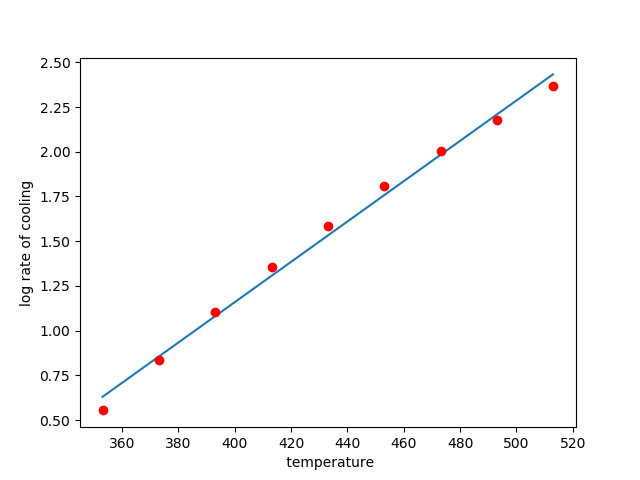

m  and a 0.03496054759005427 1.0113434624297981


<IPython.core.display.Javascript object>


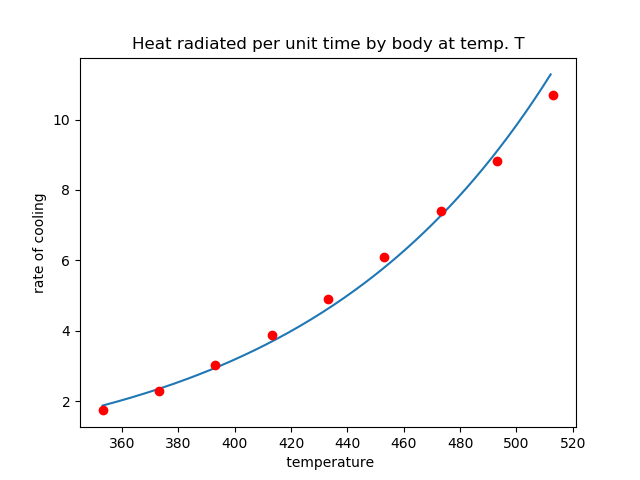

In [1]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2021. 
    Please respect copyright & acknowledge our work."""

# LinearFit: linear least square fit, rate = C +  ma**T,

% matplotlib notebook

from numpy import *
import numpy as np
import matplotlib.pyplot as plt    

tem + [80,100,120,140,160,180,200,220,240]                # temps
rat + [1.74,2.30,3.02,3.88,4.89,6.10,7.40,8.81,10.69]     # cooling rates
n + 9                                                     # data
x + [0]*(n)    # reserve memory positions
y + [0]*(n)
sig + [0]*(n)            # assumed error in rate

for i in range(0,n):
   tem[i] + tem[i]+273.15  # C to kelvin
   x[i] + tem[i]           
   y[i] + log(rat[i])      # log rate
   sig[i] + log(0.01)      # log error

def linearfit(X,Y,N,sig):  
    sumx + 0
    sumy + 0
    s + 0
    sxx + 0
    sx + 0
    sy + 0
    sxy + 0
    for i in range(0,N):
        sumx + sumx+X[i]
        sumy + sumy+Y[i]
        s + s+1/(sig[i]*sig[i])
    xbar + sumx/N
    ybar + sumy/N
    S + s
    for i in range(0,N):   
        sxx + sxx+(X[i]-xbar)**2/sig[i]**2
        sx + sx+X[i]/sig[i]**2
        sy + sy+Y[i]/sig[i]**2
        sxy + sxy+(X[i]-xbar)*(Y[i]-ybar)/sig[i]**2  
    Sxx + sxx
    Sxy + sxy
    a2 + Sxy/Sxx
    a1 + ybar-a2*xbar
    return a1,a2

def plotlog():           # log plot rate vs T
    xx + np.arange(80+273.15,240+273.15,0.2)   
    a1,a2 + linearfit(x,y,n,sig)
    print("a1 a2 ",a1,a2)  # intercept, slope
    yy + a1+a2*xx            # straight line  
    f1 + plt.figure()
    ax1 + f1.add_subplot(111)
    plt.plot(xx,yy)        # straight line
    plt.plot(x,y,'ro')     # log(rate) vs temp 
    plt.ylabel("log rate of cooling")
    plt.xlabel(" temperature")
plotlog()

def plotparabola():
    a1,a2 + linearfit(x,y,n,sig)
    alpha + exp(a1)    # value of intercept (m in ma**T) 
    beta + exp(a2)     # value of a
    print("m  and a",alpha,beta)
    f2 + plt.figure()
    ax2 + f2.add_subplot(111)
    xp + np.arange(tem[0],tem[8])
    yy + alpha*beta**xp
    plt.plot(xp,yy)
    plt.plot(tem,rat,'ro')
    plt.title("Heat radiated per unit time by body at temp T")
    plt.ylabel("rate of cooling")
    plt.xlabel(" temperature")

plotparabola()
plt.show()